# WELCOME TO NEUROSTEM WORKSHOP 2024
[insert NEUROSTEM logo here, if there is one???????]


This document will give you hands-on experience in what **neuroscientists and engineers** do when analysing Electroencephalography(EEG) data!



## Introduction

What you will learn in this workshop: 

1. How to configure Python so that it can analyse EEG data
2. How to load the data
3. How to manipulate the data
4. How to visualise the data

Note: This document you are reading is called a [Jupyter notebook](https://jupyter.org/). It is not a static document like a Microsoft Word document, but rather an interactive document that allows us to write and execute code within it!


### Coding Warm UP! 

Let's warm up! In the below empty cell called "TESTING CELL" (where code can be executed)
- Make a program that says "Hello World" (For example, type `print("Hello World")`)

- Do some simple but difficult maths (For example, type `512 * 15678 * 1.75`)

To execute the code, select the cell of interest then click on the "play" symbol (inside red circle) at the top of your document as seen in the below screenshot.

![Congratz!](pics/jpy_notebook_help.png)

In [1]:
################################# TESTING CELL ################################
# Note: Line starting with the "#" character are comments and will be ignored by Python Interpreter

# Remove the "#" from the beginning of the next line, or type it yourself to run it
# print("Hello World")


Mostafa


![Congratz!](notebook_gif/Tay_tay_congrats.gif)

Congratulations, you just wrote a simple program in Python language! Now let's move on to the fun stuff! 😊

## Learning Objective 1: Configuring Python (Loading the packages/dependecies)

Python is a very versatile and powerful programming language and tool. It can be used to program robots, create games, music and even art! However, it is essential to correctly configure Python for the right job.

For us, as engineers, Python needs to be configured with specific neuroscience tools so that it can process EEG data.

To do so we can run below code in the following cell ("CELL 1"):
 - `import mne` : this line of code configures Python with a specialised toolset named [MNE](https://github.com/mne-tools/mne-python), which is developed for EEG. 
 - `import numpy as np` : this allows Python to do complex Mathematical operations useful when manipulating EEG data
 - `import matplotlib.pyplot as plt` : this allows Python to plot the data
 - `import os` : this allows Python to access where the EEG data will be stored and loaded from



In [9]:
################################# CELL 1 ################################
# import different required packages as explained above, i.e. replace the ..... line
# import .....
#!pip install mne
import os
import mne 
import numpy as np 
import matplotlib.pyplot as plt

## Learning Objective 2 : Load Up the EEG Data

Well done, now Python is tooled up to do engineering analysis of EEG! We now need to load the data we would like to analyse. 
MNE provides a large sample EEG dataset. We have already downloaded part of this large dataset and made it available to you within this notebook environment. 

To access/load this data, your task is to modify the code in "CELL 2".

Hint:
- `raw = mne.io.read_raw_fif(file_location)`: this code will find the sample data defined in the file location variable we call here `file_location`, read the data and then store it into a variable called `raw`.
- In our case, the file location's variable has been defined as `sample_data_location`
- Modify the line `raw = mne.io.read_raw_fif(............)` so that it can access and load our sample data.


In [10]:
################################# CELL 2 ################################

sample_data_location = os.path.join(
    "sample_data", "sample_audvis_raw.fif"
) 

# Modify the ..... part to the file location name, which is "sample_data_location"!
# raw = mne.io.read_raw_fif(................)


Opening raw data file sample_data\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 61837 =     42.956 ...   102.956 secs
Ready.


Great job! Now that we've loaded the data, it's time to dive into the exciting part: understanding what we're dealing with. Why is this so crucial, you might wonder? Imagine this scenario: What if we accidentally loaded the wrong data, or worse, what if the data is corrupted or incomplete?
We definitely don't want to spend hours analysing data only to realise later that it was incorrect or flawed! Let's make sure we're on the right track from the get-go.


To check the data, we can print its quick summary to see its details stored in the `raw` variable. Just type in `raw` in "CELL 3", and execute the cell.

In [11]:
################################# CELL 3 ################################
raw

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


Take a moment to look at the data summary table provided. This table gives us a snapshot of the main characteristics of our dataset.

Do you notice any irregularities or anomalies in the data, i.e. any bad channels? If so, make a note of them. These could be potential concerns that need to be addressed or explored further.
Share your findings with your peers or teacher; see what they think!

## Learning Objective 3 : EEG Data Manipulation

Well done on getting to this part of the workshop!

Now that we've got our hands on the data, it's time to manipulate it and remove any pesky irregularities before we can plot it.
You may have noticed several points from the data summary:
1. The data is about 1 minute long. To accelerate analysis, we can crop the data to 40 seconds. 
2. The dataset includes information from various source channels/sources namely Gradiometers, Magnetometers, Stimuli, EEG, and EOG. However, our focus is solely on the EEG channels.
3. Moreover, there are bad channels. We need to remove these channels before plotting.


To complete this objective, your task is to modify the code in "CELL 4".

Hint:
- `raw.crop(tmax=5)`: this code will cut down the length of the data into whatever value has been specified for `tmax`. For this example, we have cut the data to only show us the first 5 seconds.
- `raw.drop_channels(["EEG 111"])` : this code will remove (drop) the specified channel. For this example, we are removing channel `EEG 111`
- `meg_data_only = raw.copy().pick(picks=["meg"])` : this code will pick only the specified channel types and store it into a variable called `meg_data_only`. For this example, we are extracting (picking) `meg` data only. To extract EEG data, we need to use `eeg` 


In [13]:
################################# CELL 4 ################################

# In below lines, replace the "......" by what is needed, and then uncomment the lines to run the data manipulation.
# raw_copy = raw.copy().crop(tmax=............)
# raw_copy.drop_channels(["................"])
# eeg_data_only = raw_copy.copy().pick(picks=["........"])

raw_copy = raw.copy().crop(tmax=40)
raw_copy.drop_channels(["EEG 053"])
eeg_data_only = raw_copy.copy().pick(picks=["eeg"])

# To print the information on the extracted eeg data only, uncomment the below line after successfully running the above lines to generate the new variable eeg_data_only
print(eeg_data_only.info)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


<Info | 19 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 59
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: []
 sfreq: 600.6 Hz
>


## Learning Objective 4 : Plot/Graph EEG data

Fantastic! Now the data is ready to be plotted. Your task here is to visualise the EEG data of a specific channel (e.g. '**24**') between specific times (e.g. between **5** and **15** seconds) for initial analysis. 

To do this, we will be using the `matplotlib` package that we imported earlier to plot the data.
Also, don't forget to annotate your plot! Without it, it will be meaningless to the reader. 


To complete this objective, your task is to modify the code in "CELL 5".

Hint:
- Note that we are  working on the data that we prepared in the previous step, i.e. eeg_data_only.  
- The different channel names can be identified by running `print(eeg_data_only.ch_names)`.  
- Update the `start_time` and `stop_time` variables as outline above.
- Update the variable `channel_name` as specified above. 

- To plot the data, this can be done via the code `plt.plot(x_values, y_values)`. In our case, the x values are stored in variable `time_x` and y values are in `eeg_amplitude_y`
- To annotate the plot: 
    -  `plt.xlabel('Some_x_label')` : this code is to modify the plots x label heading 
    -  `plt.ylabel('Some_y_label')` : this code is to modify the plots y label heading 
    -  `plt.title('Some_Plot_Tile')` : this code is to modify the plots heading title
    -  `plt.legend(['Some_legend_title'])` : this code is to generate a legend box and to provide it with a title
- Below is an example of what the plot should look like

![Regular Plot Example](pics/Regular_plot.png)



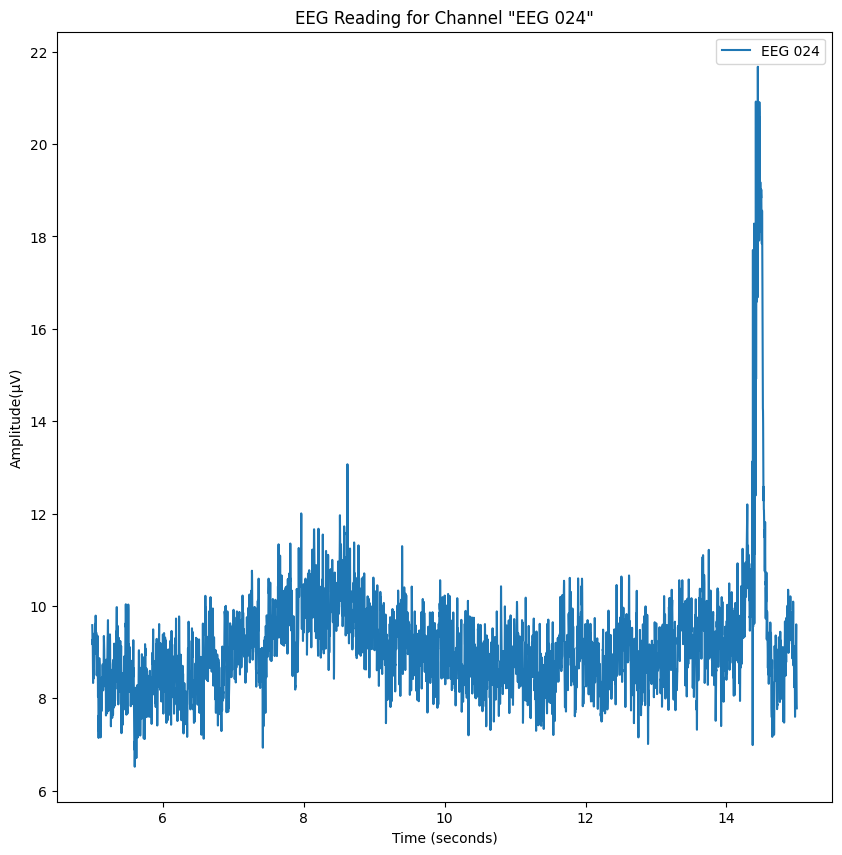

In [18]:
################################# CELL 5 ################################

# Optional: Write a line to print all available channel names 

# Modify the below lines to start at 5 and stop at 15 and show channel 24. After the modification uncomment the lines.
# start_time = ....... 
# stop_time = ........ 
# channel_name = ......  

start_time = 5
stop_time = 15 
channel_name = "EEG 024" 


##### DON"T MODIFY CODE BELOW ######
start_stop_seconds = np.array([start_time, stop_time])
sampling_freq = raw.info["sfreq"]
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
selected_eeg = eeg_data_only[channel_name, start_sample:stop_sample]

time_x = selected_eeg[1]
eeg_amplitude_y = selected_eeg[0].T * 10**5 # Convert to micro Volts
###################################


######### CODE FOR PLOTTING - Feel free to modify to change the plot size ##########
# Create a figure object with a specific size
width = 10
height = 10
plt.figure(figsize=(width, height))
###################################
 
# Modify and then uncomment the below line to plot time on the x axis (using variable time_x), and the eeg ampliture on the y axis. Which variable from the above should we use?  
# plt.plot(..... , .....)
# # Plot Annotation
# plt.xlabel(....) # Modify to show the x axis label as you wish. Note that the data is in second. 
# plt.ylabel(.)# Modify to show the y axis label as you wish. Note that the data is in micro Volt. If you would like to show mu correctly, use '\u03BC'
# plt.title(.....) # For STUDENTS to modify
# plt.legend(.......)
# plt.show()


# SOLUTION (DELETE BEFOFE THE ACTUAL EVENT)
plt.plot(time_x, eeg_amplitude_y) # For STUDENTS to modify
plt.xlabel('Time (seconds)') # For STUDENTS to modify
plt.ylabel('Amplitude(\u03BCV)')# For STUDENTS to modify
plt.title(f'EEG Reading for Channel "{channel_name}"') # For STUDENTS to modify
plt.legend([f"{channel_name}"])
plt.show()



### Challenge activity (OPTIONAL)!

Now that you have learnt to plot the data of a single channel, how about you try plotting the data of two channels at once!
You are welcome to choose any 2 channels of your liking and the same goes with the start and stop time specifications

Hint: 
- The code is similar to the single channel plot which you can reuse. However, it will need to be modified to complete this task
- This is only recommended for students with prior Python coding experience. 
- Below is an example of what the plot could look like


![Advance Plot Example!](pics/Advance_plot.png)

In [ ]:
################################# CELL 6 ################################


# Congratulations, Brain Explorers! 🎉🎉

Congratulations on completing this coding workshop. We can't wait to see where your journey takes you next! 🚀🧠 #NeuroSTEM2024

![Congratz!](notebook_gif/big_brain.gif)

